In [1]:
#10章　階層ベイズモデル -GLMMのベイズモデル化-

#この教科書の実装はR言語によるものとなっている。
#それをPythonにて実装しなおす

#########この章の簡単な説明######
"""""
前章ではGLMをベイズモデル化したが、この章ではGLMMをベイズモデル化する。

"""""
import pandas as pd
import pyper as pr
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf 

d=pd.read_csv("http://hosho.ees.hokudai.ac.jp/~kubo/stat/iwanamibook/fig/hbm/data7a.csv")
d.head()

,id,y
0,1,0
1,2,2
2,3,7
3,4,8
4,5,1


In [6]:
#各変数の型の確認
d.dtypes

id    int64
y     int64
dtype: object

In [2]:
#変数の概要を調べる
d.describe()

,id,y
count,100.000000,100.000000
mean,50.500000,4.030000
std,29.011492,3.150934
min,1.000000,0.000000
25%,25.750000,1.000000
50%,50.500000,4.000000
75%,75.250000,7.000000
max,100.000000,8.000000


In [ ]:
#GLMMのベイズモデル化
#尤度は二項分布
#リンク関数はロジット
#説明変数は定数項と個体差rの二つ
#定数項の事前分布は平均0で標準偏差100の正規分布とする。
#個体差rを平均0で標準偏差sの正規分布、sを[0,10^4]の一様分布とする。
#個体差rの事前分布のパラメータsについても事前分布を設定するので、階層ベイズモデルという

In [3]:
import pymc3 as pm

with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=100)
    s = pm.Uniform("s", upper= 10000, lower= 0)
    r = pm.Normal('r', mu=0, sd=s,shape=len(d["y"]))
    p= pm.invlogit(alpha + r)
    Y_obs = pm.Binomial("Y_obs", n=8, p=p, observed=d["y"])

    
#下記はNUTSというサンプリング方法
#その他メトロポリスなど
with model:
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(1600, step, start,njobs=3)

logp = -308.75, ||grad|| = 0.11604: 100%|████████████████████████████████████████████| 51/51 [00:00<00:00, 2321.92it/s]
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [r, s, alpha]
Sampling 3 chains: 100%|███████████████████████████████████████████████████████| 6300/6300 [00:14<00:00, 434.99draws/s]
C:\Users\hirou\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FF08AAED68>,
      dtype=object)

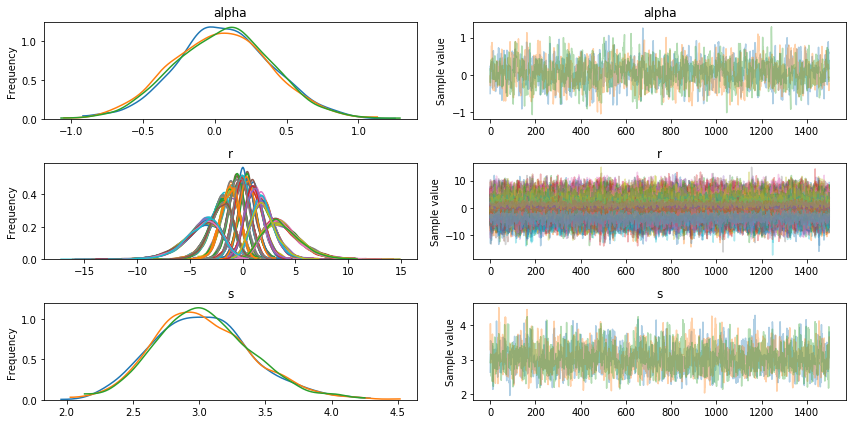

In [4]:
pm.traceplot(trace[100:])

In [5]:
pm.summary(trace[100:])
#rは個体差のため、データのサイズ分ある。

C:\Users\hirou\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,0.057517,0.337490,0.009899,-0.589327,0.726882,1062.502323,1.000668
r__0,-3.857615,1.804097,0.027314,-7.483791,-0.735950,3662.014137,0.999738
r__1,-1.211444,0.897758,0.013825,-2.926949,0.546728,3700.248052,0.999802
r__2,1.989838,1.110392,0.016939,-0.039542,4.300662,4693.327180,0.999719
r__3,3.729196,1.710771,0.026508,0.626352,7.008334,4363.021507,0.999891
r__4,-2.089266,1.119937,0.017834,-4.226865,0.004735,4070.431450,0.999667
r__5,1.983754,1.093094,0.016220,-0.045197,4.139305,4486.820784,1.000492
r__6,3.783028,1.805731,0.026050,0.727482,7.447915,4566.715162,1.000532
r__7,3.800105,1.792220,0.030670,0.482412,7.304193,3946.602246,1.000017
r__8,-2.073639,1.094577,0.015722,-4.296720,-0.082434,4425.778099,0.999770
